# Функции в Pandas
Примеры из презентации

In [5]:
import pandas as pd

In [32]:
df = pd.DataFrame({'user_id': [1, 2, 3], 'clicks': [163, 130, 97], 'orders': [2, 4, 0]})
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [11]:
def watcher(a):
    """Мне только посмотреть"""
    if a == 0:
        return True
    
    return False

Применяем метод apply к одному столбцу. Сейчас в переменную функции передаются значения одного столбца

In [12]:
df['orders'].apply(watcher)

0    False
1    False
2     True
Name: orders, dtype: bool

In [13]:
df

,user_id,clicks,orders
0,1,163,2
1,2,130,4
2,3,97,0


In [14]:
df['watcher'] = df['orders'].apply(watcher)
df

,user_id,clicks,orders,watcher
0,1,163,2,False
1,2,130,4,False
2,3,97,0,True


In [15]:
def conversion(a):
    """Подсчет конверсии переходов в покупки"""
    return a['orders'] / a['clicks']

Применяем метод apply к датафрейму. В переменную функции передаются строки целиком

In [16]:
df.apply(conversion, axis=1)

0    0.012270
1    0.030769
2    0.000000
dtype: float64

In [17]:
df['conversion'] = df.apply(conversion, axis=1)
df

,user_id,clicks,orders,watcher,conversion
0,1,163,2,False,0.012270
1,2,130,4,False,0.030769
2,3,97,0,True,0.000000


In [18]:
user_id = 100500
'col_{}'.format(user_id)

'col_100500'

In [19]:
def metriks(row):
    return pd.Series({'col_1': 1, 'col_2': 2})

In [20]:
df.apply(metriks, axis=1)

,col_1,col_2
0,1,2
1,1,2
2,1,2


In [33]:
def veb(row):
    user_id = row.user_id
    
    return pd.Series({'col_{}'.format(user_id):1})

In [34]:
df.apply(veb, axis=1)

,col_1,col_2,col_3
0,1.0,NaN,NaN
1,NaN,1.0,NaN
2,NaN,NaN,1.0


### Анализ рекламных кампаний

In [6]:
stats = pd.read_excel('ad_campaigns.xlsx')
stats.head()

,Название группы,Фраза (с минус-словами),Продуктивность,ID объявления,Заголовок,Текст,Ссылка
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


In [7]:
stats.columns = ['group', 'phrase', 'effect', 'ad_id', 'title', 'text', 'link']
stats.head()

,group,phrase,effect,ad_id,title,text,link
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...


### Lambda-функции
Хотим посчитать распределение количества слов в столбце с фразами

In [8]:
phrase = 'МРТ на Менделеевской от 2000₽'

In [40]:
phrase.split(' ')

['МРТ', 'на', 'Менделеевской', 'от', '2000₽']

In [41]:
len(phrase.split(' '))

5

In [9]:
stats['word_count'] = stats['phrase'].apply(lambda x: len(x.split(' ')))
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [46]:
# вариант с передачей всей строчки функции
# тут надо обязательно указать параметр axis = 1

stats['word_count'] = stats.apply(lambda x: len(x['phrase'].split(' ')), axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [6]:
stats['word_count'].value_counts()

3     1129
4      529
2      189
5      137
6       84
7       38
8       30
9       12
10       6
12       2
21       1
17       1
11       1
Name: word_count, dtype: int64

In [7]:
%matplotlib inline

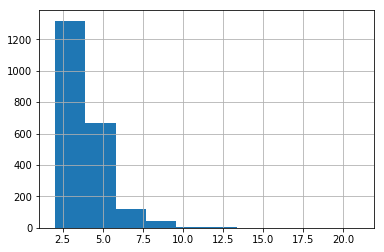

In [8]:
stats['word_count'].hist()

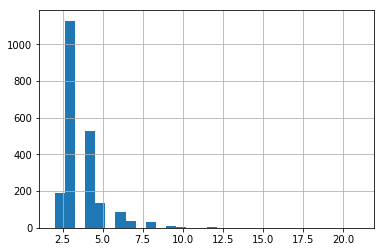

In [9]:
stats['word_count'].hist(bins=30)

### Упражнение
Поисковые запросы с каким количеством слов встречаются в наших данных чаще всего? Выведите топ-5

In [51]:
# max(stats[word_count])
# 
# stats['word_count'] = stats['phrase'].apply(lambda x: len(x.split(' ')))
max(stats['word_count'])

21

In [57]:
# stats['word_count'].value_copunts()

AttributeError: 'Series' object has no attribute 'value_copunts'

In [54]:
stats.sort_values(by='word_count', ascending=False).head(5)

,group,phrase,effect,ad_id,title,text,link,word_count
2131,мрт на кутузовском проспекте,сделать мрт в москве -где -головы -дешевле -ка...,8.1,3401169397,Сделайте МРТ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,21
1756,в москва мрт скидка со,в москва мрт сделать -где -голова -дешево -кач...,8.0,2428554769,Сделайте МРТ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,17
29,мрт куркино,мрт на алексеевской -головы -м -метро -мытищин...,6.3,2101705038,МРТ в Москве от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,12
1737,в делают москве где мрт,в где москва мрт сделать -голова -лучше -можно...,6.6,2428554744,Сделайте МРТ в Москве от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,12
26,мрт на алексеевской,мрт на павелецкой -головы -круглосуточно -метр...,6.3,2101705029,МРТ в Москве от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,11


In [56]:
s = pd.DataFrame()
s.append(stats['word_count'].value_counts().head(5)).T

,word_count
2,189.0
3,1129.0
4,529.0
5,137.0
6,84.0


### Произвольные функции
В URL кампаний есть названия. С этим надо что-то делать

In [10]:
# пример ссылки
url = stats.loc[0, 'link']
url

'https://awesome-site.ru/?utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}'

In [11]:
from urllib import parse

In [13]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal')

SplitResult(scheme='https', netloc='ya.ru', path='/news/sport', query='search=footbal', fragment='')

In [14]:
parse.urlsplit('https://ya.ru/news/sport?search=footbal').query

'search=footbal'

In [15]:
parsed = parse.urlsplit(url)
parsed

SplitResult(scheme='https', netloc='awesome-site.ru', path='/', query='utm_source=yandex&utm_medium=cpc&utm_campaign=a825749b87&utm_content=dev_{device_type}', fragment='')

In [16]:
# можно конечно вручную
parsed.query.split('&')[2].split('=')[1]

'a825749b87'

In [17]:
# как доставать значения

parsed.netloc

'awesome-site.ru'

In [18]:
params = parse.parse_qs(parsed.query)
params

{'utm_source': ['yandex'],
 'utm_medium': ['cpc'],
 'utm_campaign': ['a825749b87'],
 'utm_content': ['dev_{device_type}']}

In [19]:
# вот и кампании

params['utm_campaign'][0]

'a825749b87'

In [20]:
# зачем тут везде списки?

url_with_doubles = 'https://awesome-site.ru/?a=1&a=2&a=3'

parsed = parse.urlsplit(url_with_doubles)
parse.parse_qs(parsed.query)

{'a': ['1', '2', '3']}

In [22]:
# оборачиваем все в функцию
# в качестве аргумента будет строка датафрейма

def campaign_name(row):
    """Получение названия кампании из ссылки внутри строки row"""

    parsed = parse.urlsplit(row['link'])
    params_dict = parse.parse_qs(parsed.query)

    return params_dict['utm_campaign'][0]

In [23]:
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2


In [24]:
stats['campaign'] = stats.apply(campaign_name, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca


In [73]:
# как передать несколько аргументов

def power_up(row, n):
    """Возводит значение столбца effect в степень n"""
    return row['effect'] ** n

In [74]:
stats['power_up'] = stats.apply(power_up, n=3, axis=1)
stats.head()

,group,phrase,effect,ad_id,title,text,link,word_count,campaign,wer,power_up
0,мрт менделеевская,"""!мрт !менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,False,91.125
1,мрт цао,"""мрт менделеевская""",4.5,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,a825749b87,False,91.125
2,мрт цао,мрт менделеевская -головы -позвоночника -сдела...,7.4,2101704995,МРТ на Менделеевской от 2000₽,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,6,a825749b87,False,405.224
3,мрт цао,"""!мрт !цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,False,125.000
4,мрт сао,"""мрт цао""",5.0,2101704999,МРТ в ЦАО от 2000₽. Звоните!,24 часа. МРТ в день обращения. Консультация вр...,https://awesome-site.ru/?utm_source=yandex&utm...,2,9cc0c5f6ca,False,125.000


### Упражнение
В наших данных есть много объявлений с услугой МРТ (в названии группы есть слово 'мрт') круглосуточно (в тексте объявления есть '24 часа'). Выделите строки, в которых не упоминается МРТ, но прием идет круглосуточно. Сколько таких строк в датасете?

In [36]:
def wer(row, a, b):
    if (a not in row['text'].lower()) & (b not in row['text'].lower()):
        
        return True
    return False

stats['wer'] = stats.apply(wer, a='мрт', b='24 часа', axis=1)
stats['wer'].value_counts()

False    2159
Name: wer, dtype: int64

# Группировки

In [37]:
df = pd.DataFrame({'order_id': [1, 2, 3, 4, 5], 'country': ['Россия', 'Китай', 'Китай', 'Россия', 'Россия'], 
                   'category': ['Электроника', 'Авто', 'Электроника', 'Авто', 'Авто'], 
                   'amount': [100, 80, 90, 140, 90]})
df

,order_id,country,category,amount
0,1,Россия,Электроника,100
1,2,Китай,Авто,80
2,3,Китай,Электроника,90
3,4,Россия,Авто,140
4,5,Россия,Авто,90


### Упражнение
Создайте датафрейм df_russia, в котором оставьте заказы из России. И аналогично df_china (заказы из Китая).

In [44]:
df_russia = df[df['country']=='Россия']
df_china = df[df['country']=='Китай']

In [46]:
df_russia

,order_id,country,category,amount
0,1,Россия,Электроника,100
3,4,Россия,Авто,140
4,5,Россия,Авто,90


In [45]:
df_china

,order_id,country,category,amount
1,2,Китай,Авто,80
2,3,Китай,Электроника,90


### Упражнение
Посчитайте для df_russia и df_china:
- среднюю стоимость заказа
- разницу между максимальной и минимальной стоимостью заказа

In [50]:
df_russia['amount'].mean(), df_russia['amount'].max() - df_russia['amount'].min()

(110.0, 50)

In [52]:
df_china['amount'].mean()

85.0

In [51]:
df_china['amount'].max() - df_china['amount'].min()

10

Объединим процесс разбиения на датафреймы

In [56]:
def groupby_function(data):
    
    return data.amount.mean()

In [57]:
df.groupby('country').apply(groupby_function)

country
Китай      85.0
Россия    110.0
dtype: float64

Вернемся к статистике рекламных кампаний

In [58]:
# раньше использовали value_counts

stats['campaign'].value_counts().head()

7f35591a28    456
8e77a0e565    348
2cc2e7d770    240
f6d2ae1e3d    220
e90f4db55a    218
Name: campaign, dtype: int64

In [60]:
# более универсальный способ

stats.groupby('campaign').count().head()

,group,phrase,effect,ad_id,title,text,link,word_count,wer
campaign,,,,,,,,,
034ada41b6,3,3,3,3,3,3,3,3,3
03fcaecd1d,2,2,2,2,2,2,2,2,2
0697a81555,2,2,2,2,2,2,2,2,2
08cdcb57a3,3,3,3,3,3,3,3,3,3
0f0ba311fb,2,2,2,2,2,2,2,2,2


In [61]:
stats.groupby('campaign').count()[['group', 'effect']].head()

,group,effect
campaign,,
034ada41b6,3,3
03fcaecd1d,2,2
0697a81555,2,2
08cdcb57a3,3,3
0f0ba311fb,2,2


In [28]:
stats.index.values

array([   0,    1,    2, ..., 2156, 2157, 2158])

### Как вернуть столбец из индекса

In [62]:
stats.groupby('campaign').count().reset_index().head()

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,wer
0,034ada41b6,3,3,3,3,3,3,3,3,3
1,03fcaecd1d,2,2,2,2,2,2,2,2,2
2,0697a81555,2,2,2,2,2,2,2,2,2
3,08cdcb57a3,3,3,3,3,3,3,3,3,3
4,0f0ba311fb,2,2,2,2,2,2,2,2,2


In [68]:
# тоже самое, что с value_counts

stats.groupby('campaign').count().reset_index().sort_values('group', ascending=False).head() 

,campaign,group,phrase,effect,ad_id,title,text,link,word_count,wer
62,7f35591a28,456,456,456,456,456,456,456,456,456
69,8e77a0e565,348,348,348,348,348,348,348,348,348
22,2cc2e7d770,240,240,240,240,240,240,240,240,240
110,f6d2ae1e3d,220,220,220,220,220,220,220,220,220
105,e90f4db55a,218,218,218,218,218,218,218,218,218


In [69]:
# но теперь можно менять функции ура

stats.groupby('campaign').sum().sort_values('effect').head()

,effect,ad_id,word_count,wer
campaign,,,,
63153306ff,2.8,2428554756,4,False
f80e902d76,3.3,2101705003,2,False
5a7508fa8d,3.5,2428554764,4,False
d5b16c7769,3.6,3401169381,4,False
7b17b2d188,5.8,2101705006,2,False


### Упражнение
Для каждой кампании campaign найдите минимальное значение столбца effect и постройте рейтинг кампаний по этим значениям, начиная с самого низкого.

In [80]:
stats.groupby('campaign').min().sort_values('effect', ascending=True)['effect']

campaign
8e77a0e565    1.6
7f35591a28    1.7
be97523396    1.8
d96029561c    1.8
acc3077e55    1.9
2cc2e7d770    1.9
f6d2ae1e3d    1.9
56f3d9eaff    1.9
90299cb806    1.9
7388fb4c7b    1.9
e90f4db55a    1.9
1a39ecc6ce    1.9
8d3a748298    2.0
c0c9fe22b7    2.1
777160ba51    2.1
706fcb19c3    2.2
9cc20f7a67    2.2
5680da7bdf    2.2
2db1121377    2.2
10f0dbeae4    2.2
6770528fff    2.3
9d35dc6a56    2.3
c2e4dcddaf    2.3
f0079349af    2.3
718ce6a065    2.3
6bdff94e84    2.3
1f39b7a501    2.5
172c17eaba    2.7
63153306ff    2.8
edb6a77e3b    2.8
             ... 
a825749b87    4.5
c189a246bd    4.6
33e8b25a9e    4.8
2775b98c81    4.8
52a474fef2    4.8
9cc0c5f6ca    5.0
8c26e3c9fb    5.0
27d3cfb133    5.0
82115c21af    5.1
b0fb5bd15c    5.3
22797af531    5.4
5ba2e2d560    5.5
08cdcb57a3    5.5
7b17b2d188    5.8
942cf4ac20    6.3
3e3a02c7b5    6.3
da872d1fb4    6.6
3cba0fca70    6.7
9bf072c32b    7.2
6e8f620704    7.2
779ad0e7f3    7.3
a117c5fc1b    7.4
8efe80b27c    7.4
a5444a2280    7.4
b

In [81]:
stats.head(15).to_csv('name.csv')

In [82]:
stats.head(15).to_excel('name.xlsx', index=False)

### Несколько функций в группировках

In [70]:
# задаем несколько функций сразу

stats.groupby('campaign').agg(['min', 'max'])['effect'].head()

,min,max
campaign,,
034ada41b6,4.1,9.0
03fcaecd1d,4.0,6.5
0697a81555,4.0,5.5
08cdcb57a3,5.5,7.4
0f0ba311fb,4.4,6.4


In [75]:
# разные метрики для разных столбцов

results = stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})
results.head()

effect         power_up
              min  max        mean
campaign                          
034ada41b6    4.1  9.0  470.682000
03fcaecd1d    4.0  6.5  169.312500
0697a81555    4.0  5.5  115.187500
08cdcb57a3    5.5  7.4  245.991333
0f0ba311fb    4.4  6.4  173.664000

In [76]:
results['effect']['max']

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
10f0dbeae4    2.3
1176612405    6.1
11d5b8b473    4.9
172c17eaba    7.6
1849dc35cf    8.4
1a39ecc6ce    2.4
1a419ad286    4.3
1f39b7a501    2.9
218404d350    7.5
22797af531    5.4
23d6da5a5a    8.7
254567583a    6.3
2775b98c81    8.7
27d3cfb133    8.5
285b2840bb    8.7
28d8dca4df    8.4
2b6d8d8535    8.7
2cc2e7d770    8.1
2db1121377    2.2
3157b77d24    8.7
33e8b25a9e    6.7
3cba0fca70    8.7
3e3a02c7b5    8.7
3eb8e263e0    8.5
41af22f2cc    8.8
             ... 
a825749b87    7.4
acc3077e55    7.7
adbedfa534    8.3
b067aafafd    4.9
b0fb5bd15c    8.7
b3f52e6f64    7.5
bcc95186aa    8.7
bd64204705    7.1
be97523396    7.9
c0c9fe22b7    6.9
c189a246bd    8.5
c2e4dcddaf    6.9
d0712ff587    8.7
d5b16c7769    3.6
d920f4dfbb    4.8
d96029561c    7.7
da872d1fb4    6.6
e2a26d3100    4.3
e2e45b2b2a    3.8
e7b94d5bd9    8.1
e90f4db55a    7.9
eb577faed1    8.5
edb6a77e3b    8.7
f0079349af    7.5
f

In [34]:
stats.groupby('campaign').agg({'effect': ['min', 'max'], 'power_up': 'mean'})['effect']['max']

campaign
034ada41b6    9.0
03fcaecd1d    6.5
0697a81555    5.5
08cdcb57a3    7.4
0f0ba311fb    6.4
10f0dbeae4    2.3
1176612405    6.1
11d5b8b473    4.9
172c17eaba    7.6
1849dc35cf    8.4
1a39ecc6ce    2.4
1a419ad286    4.3
1f39b7a501    2.9
218404d350    7.5
22797af531    5.4
23d6da5a5a    8.7
254567583a    6.3
2775b98c81    8.7
27d3cfb133    8.5
285b2840bb    8.7
28d8dca4df    8.4
2b6d8d8535    8.7
2cc2e7d770    8.1
2db1121377    2.2
3157b77d24    8.7
33e8b25a9e    6.7
3cba0fca70    8.7
3e3a02c7b5    8.7
3eb8e263e0    8.5
41af22f2cc    8.8
             ... 
a825749b87    7.4
acc3077e55    7.7
adbedfa534    8.3
b067aafafd    4.9
b0fb5bd15c    8.7
b3f52e6f64    7.5
bcc95186aa    8.7
bd64204705    7.1
be97523396    7.9
c0c9fe22b7    6.9
c189a246bd    8.5
c2e4dcddaf    6.9
d0712ff587    8.7
d5b16c7769    3.6
d920f4dfbb    4.8
d96029561c    7.7
da872d1fb4    6.6
e2a26d3100    4.3
e2e45b2b2a    3.8
e7b94d5bd9    8.1
e90f4db55a    7.9
eb577faed1    8.5
edb6a77e3b    8.7
f0079349af    7.5
f

In [35]:
# группировка по нескольким столбцам

stats.groupby(['group', 'campaign']).count().head()

phrase  effect  ad_id  title  text  link  \
group                campaign                                               
1 5 москва мрт тесла 777160ba51       1       1      1      1     1     1   
                     8e77a0e565       1       1      1      1     1     1   
                     f0079349af       1       1      1      1     1     1   
1 градская мрт       7f35591a28       3       3      3      3     3     3   
1 мрт нагатинский    8e77a0e565       1       1      1      1     1     1   

                                 word_count  power_up  
group                campaign                          
1 5 москва мрт тесла 777160ba51           1         1  
                     8e77a0e565           1         1  
                     f0079349af           1         1  
1 градская мрт       7f35591a28           3         3  
1 мрт нагатинский    8e77a0e565           1         1

In [36]:
# максимальное число объявлений в одной группе

stats.groupby(['group', 'campaign']).count().sort_values('phrase', ascending=False).head()

,,phrase,effect,ad_id,title,text,link,word_count,power_up
group,campaign,,,,,,,,
мрт на алексеевской кулаков переулок 13,7f35591a28,3,3,3,3,3,3,3,3
мрт каширское шоссе,7f35591a28,3,3,3,3,3,3,3,3
мрт кутузовский,7f35591a28,3,3,3,3,3,3,3,3
мрт куркинское шоссе 30,7f35591a28,3,3,3,3,3,3,3,3
мрт куркино,7f35591a28,3,3,3,3,3,3,3,3


### Упражнение
Какая кампания имеет наименьшую сумму по столбцу effect? 

# Агрегированные группировки
Считаем метрики для пользователей, которые выставили 100 и более оценок

In [59]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Упражнение
Посчитайте среднее значение Lifetime киноманов (пользователи, которые поставили 100 и более рейтингов). Под Lifetime понимается разница между максимальным и минимальным значением timestamp для каждого пользователя. Ответ дайте в днях.

In [ ]:
ratings.groupby('userId').count().head()

In [ ]:
ratings_filtered[.... > 100]

In [ ]:
ratings_filtered['userId'].tolist()

In [ ]:
ratings[ ratings['userId'].isin(...) ]